In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('medical_examination.csv')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.cholesterol.value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

In [5]:
df.gluc.value_counts()

1    59479
3     5331
2     5190
Name: gluc, dtype: int64

In [6]:
# df['overweight'] = 
#  first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT
# overweight and the value 1 for overweight.
df['overweight'] = df['weight'] / (df['height']/100)**2 > 25
df['overweight'] = df['overweight'].replace({False:0, True:1})

In [7]:
df[['cholesterol','gluc']] = df[['cholesterol','gluc']].replace({0:1, 1:0, 2:1, 3:1})

In [8]:
df.cholesterol.value_counts()

0    52385
1    17615
Name: cholesterol, dtype: int64

In [9]:
df.gluc.value_counts()

0    59479
1    10521
Name: gluc, dtype: int64

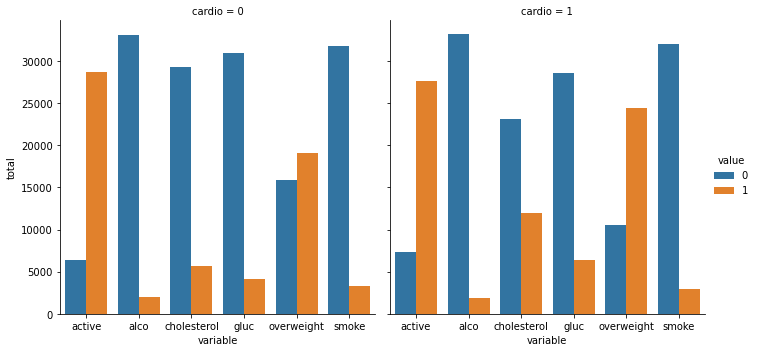

In [10]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
df_cat = df_cat.sort_values(by=['variable'])
fig = sns.catplot(data = df_cat, x='variable', hue='value', kind='count', col='cardio')
fig.set_ylabels('total')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
 13  overweight   70000 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 7.5 MB


In [12]:
clean_df = df[(df['ap_lo'] <= df['ap_hi'])]
clean_df = clean_df[(df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975))]
df_heat = clean_df[(df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

C:\Users\alanp\AppData\Local\Temp/ipykernel_13928/226892094.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = clean_df[(df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975))]
C:\Users\alanp\AppData\Local\Temp/ipykernel_13928/226892094.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_heat = clean_df[(df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]


<AxesSubplot:>

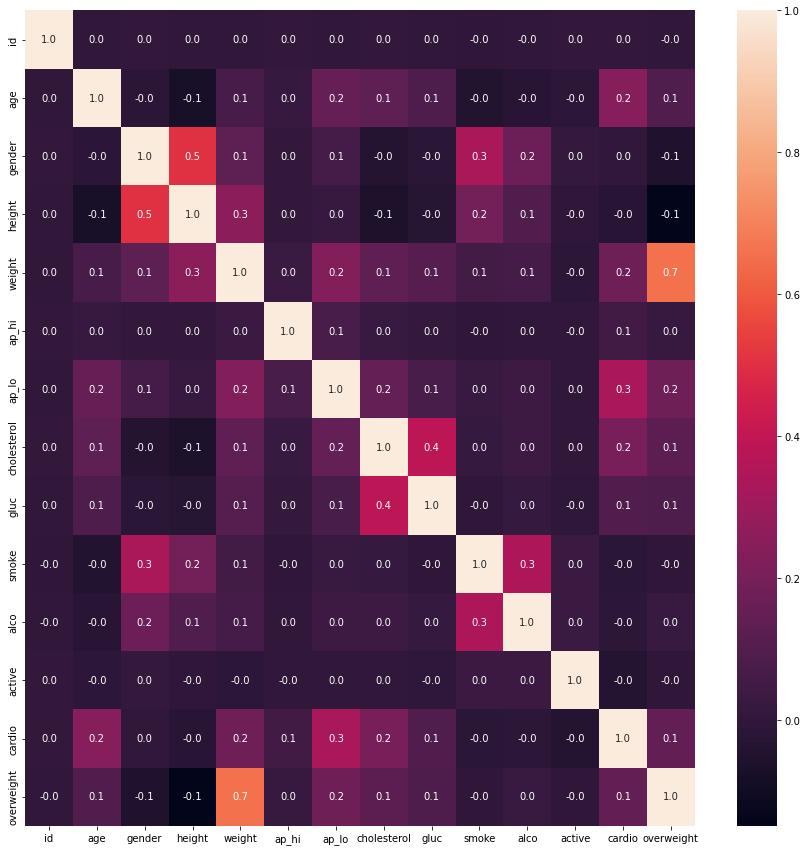

In [13]:
corr = df_heat.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt='.1f')

In [14]:
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
gender,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


<AxesSubplot:>

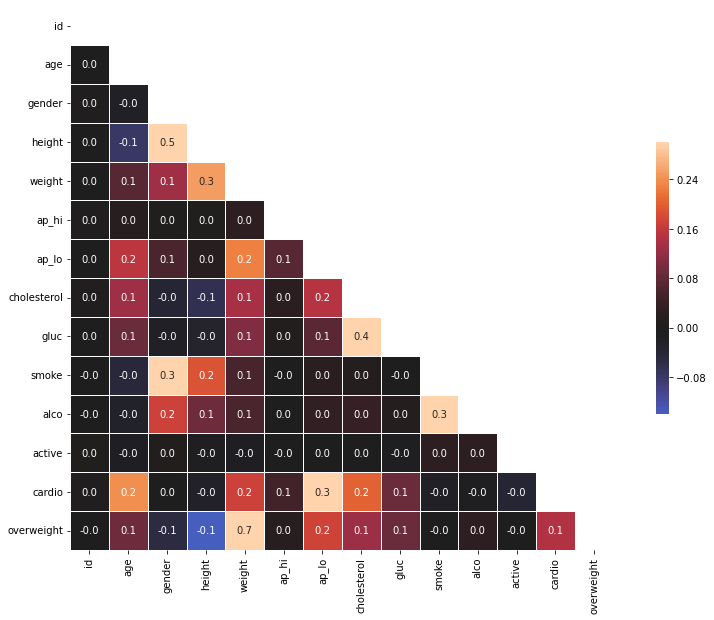

In [15]:
mask = np.triu(corr)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.1f', mask = mask, linewidth=1, vmax=.3, vmin=-0.14, center=0.0, square=True, cbar_kws = {'shrink' : 0.5, 'ticks':[-0.08,0,0.08,0.16,0.24]})

Traceback (most recent call last):
  File "/home/runner/boilerplate-medical-data-visualizer-1/test_module.py", line 47, in test_heat_map_values
    self.assertEqual(actual, expected, "Expected different values in heat map.")
AssertionError: Lists differ: ['0.0[59 chars], '0.2', '0.0', '0.0', '0.0', '0.0', '0.0', '0[548 chars]0.1'] != ['0.0[59 chars], '0.3', '0.0', '0.0', '0.0', '0.0', '0.0', '0[548 chars]0.1']

First differing element 9:
'0.2'
'0.3'

Diff is 1023 characters long. Set self.maxDiff to None to see it. : Expected different values in heat map.

In [16]:

def draw_cat_plot():


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = None

    # Calculate the correlation matrix
    corr = None

    # Generate a mask for the upper triangle
    mask = None



    # Set up the matplotlib figure
    fig, ax = None

    # Draw the heatmap with 'sns.heatmap()'



    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


IndentationError: expected an indented block (Temp/ipykernel_13928/969565189.py, line 5)